<a href="https://colab.research.google.com/github/Rehima1/flask-churn-prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import pickle

In [2]:
churn_df = pd.read_csv("Churn_Modelling.csv")

In [3]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
null = churn_df.isnull().sum()
print(f"the null values: {null}")

the null values: RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
churn_df.drop(columns= ['CustomerId', 'RowNumber', 'Surname'], inplace = True)

In [8]:
churn_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

**Data Exploration**

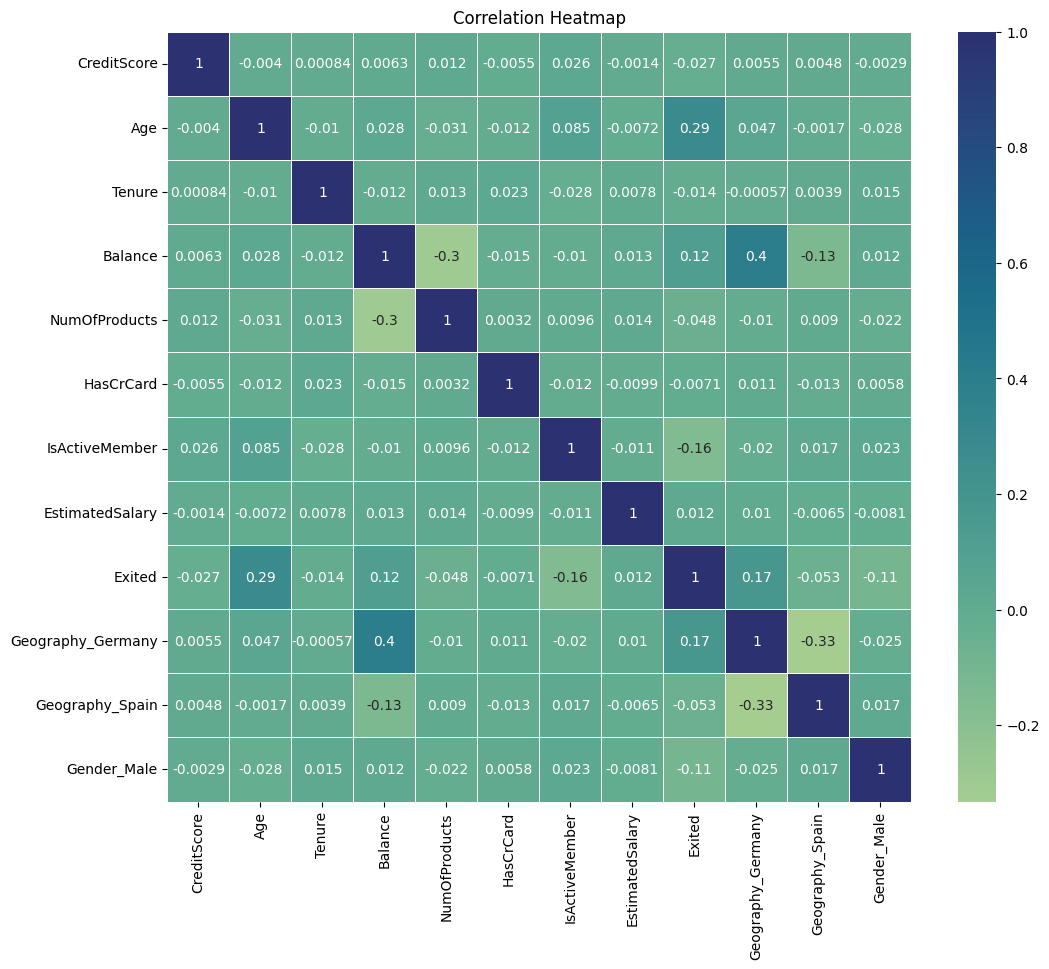

In [9]:
churn_encoded_df = pd.get_dummies(churn_df, columns=['Geography', 'Gender'], drop_first=True)

plt.figure(figsize=(12, 10))
sns.heatmap(churn_encoded_df.corr(), annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

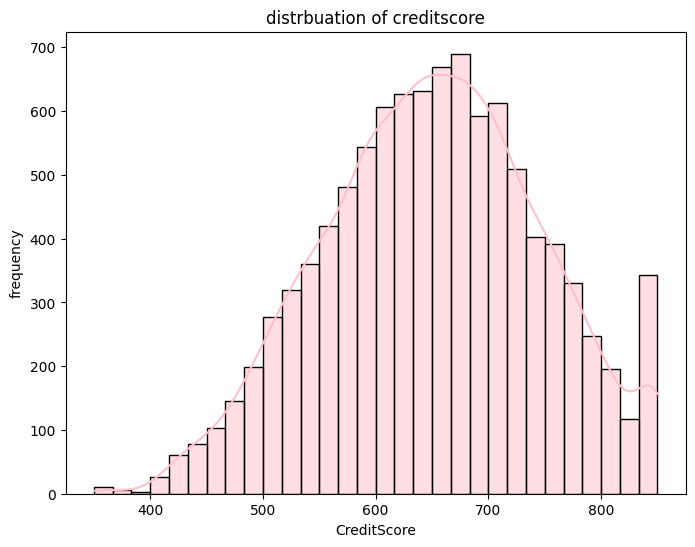

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(churn_df['CreditScore'], bins=30, kde=True, color='pink')
plt.title("distrbuation of creditscore")
plt.xlabel('CreditScore')
plt.ylabel('frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

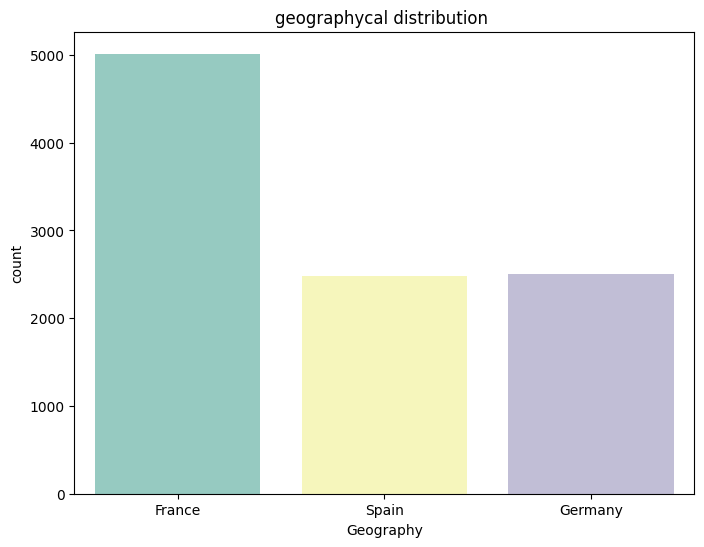

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data = churn_df, x ='Geography', palette = 'Set3')
plt.title("geographycal distribution ")
plt.xlabel('Geography')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

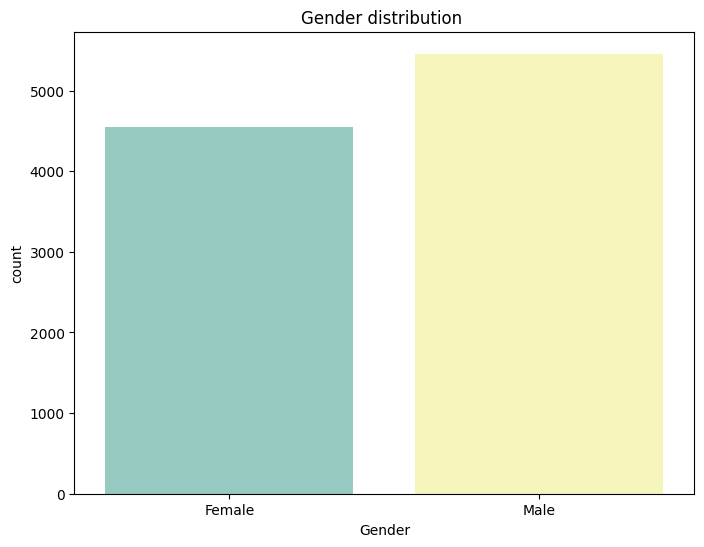

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data = churn_df, x ='Gender', palette = 'Set3')
plt.title("Gender distribution ")
plt.xlabel('Gender')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

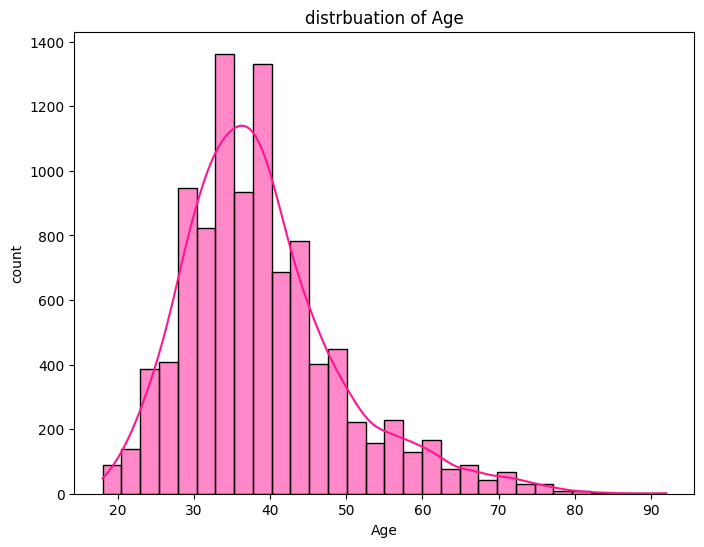

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(churn_df['Age'], bins=30, kde=True, color='deeppink')
plt.title("distrbuation of Age")
plt.xlabel('Age')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

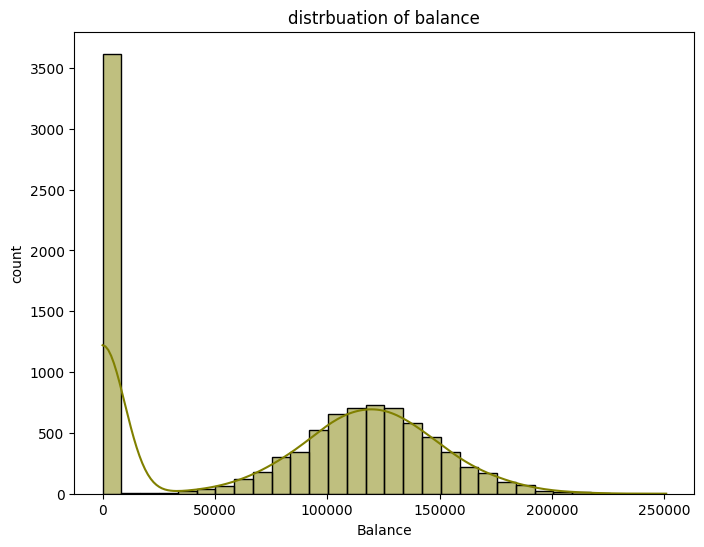

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(churn_df['Balance'], bins=30, kde=True, color='olive')
plt.title("distrbuation of balance")
plt.xlabel('Balance')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

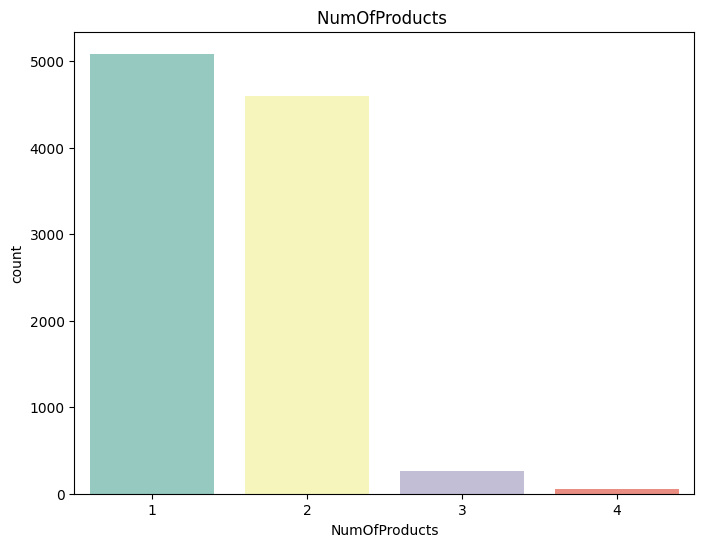

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data = churn_df, x ='NumOfProducts', palette = 'Set3')
plt.title("NumOfProducts ")
plt.xlabel('NumOfProducts')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

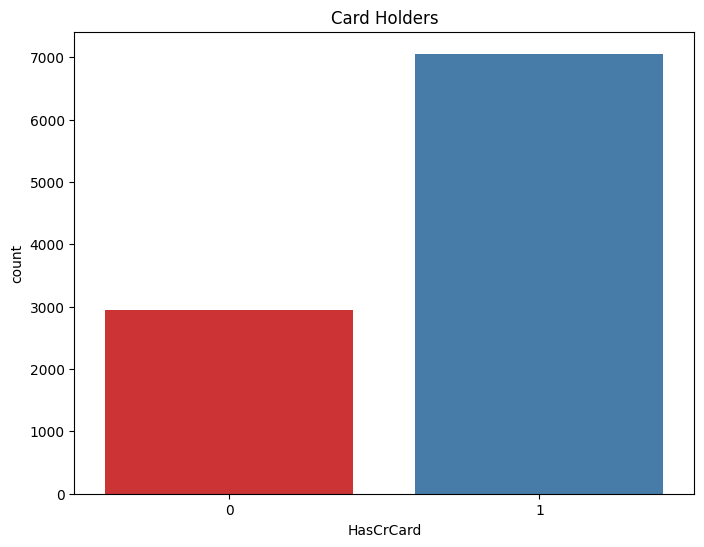

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data = churn_df, x ='HasCrCard', palette = 'Set1')
plt.title("Card Holders")
plt.xlabel('HasCrCard')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

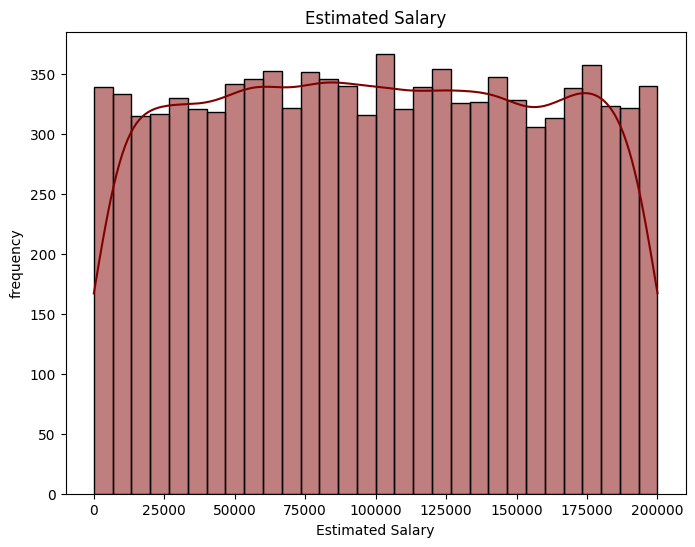

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(churn_df['EstimatedSalary'], bins=30, kde=True, color='maroon')
plt.title("Estimated Salary")
plt.xlabel('Estimated Salary')
plt.ylabel('frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

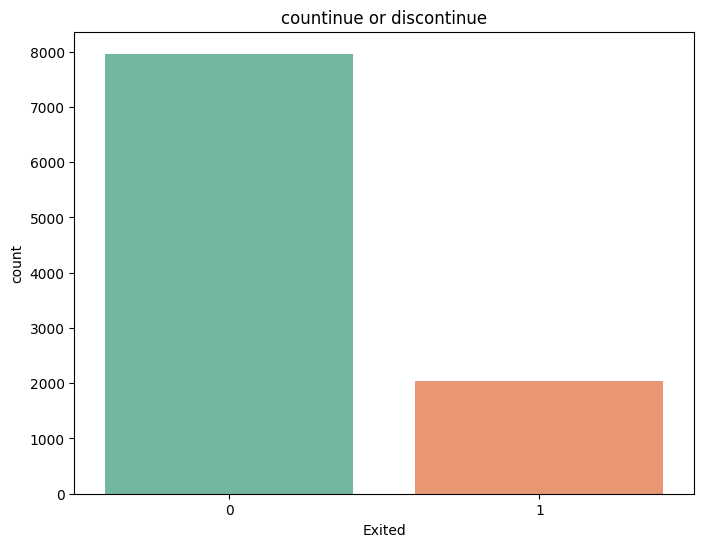

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data = churn_df, x ='Exited', palette = 'Set2')
plt.title("countinue or discontinue")
plt.xlabel('Exited')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

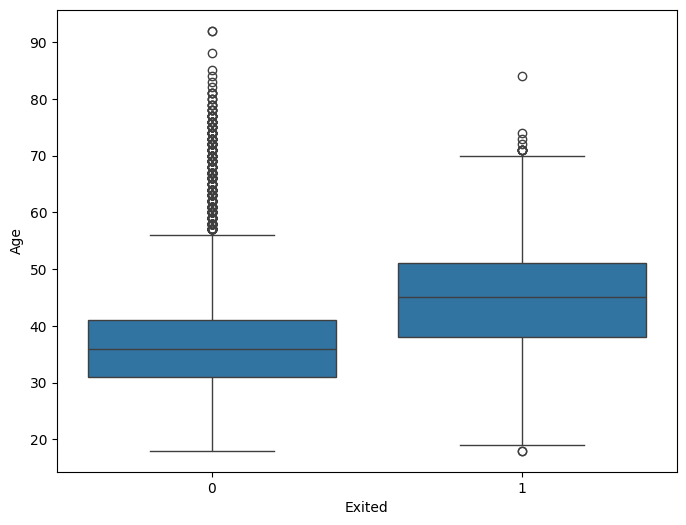

In [19]:
plt.figure(figsize = (8,6))
sns.boxplot( data = churn_df, x= 'Exited', y = 'Age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

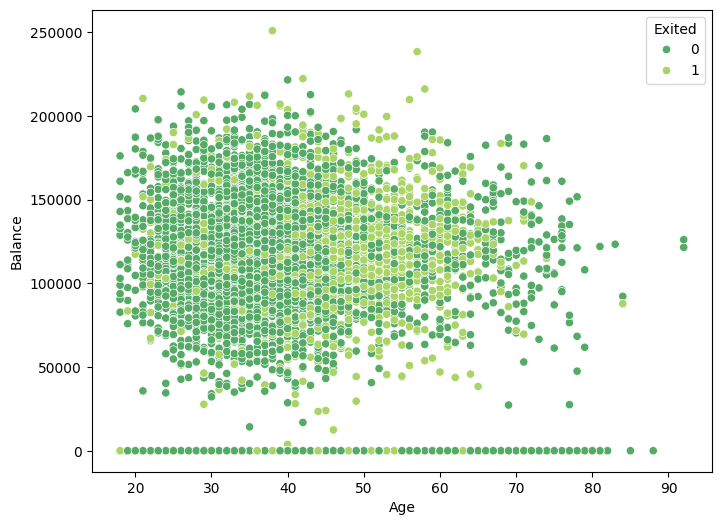

In [20]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = churn_df, x = 'Age', y= 'Balance', palette = 'summer', hue ='Exited')
plt.show

In [21]:
churn_df = pd.get_dummies(churn_df, columns=['Geography'],dtype=int,drop_first=True)

In [22]:
input_col = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
target_col = "Exited"
input_col

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain']

In [23]:
churn_df['Gender'] = churn_df['Gender'].map({"Male": 0, "Female":1})

In [24]:
churn_train_df, churn_test = train_test_split(churn_df,test_size = 0.2,random_state=42)
churn_train , churn_val = train_test_split(churn_train_df,test_size=0.25,random_state=42)


In [25]:
train_input = churn_train[input_col].copy()
train_target = churn_train[target_col].copy()
test_input = churn_test[input_col].copy()
test_target = churn_test[target_col].copy()
val_input = churn_val[input_col].copy()
val_target = churn_val[target_col].copy()

In [26]:
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender']
categorical_col = ['Geography_Germany','Geography_Spain']

In [27]:
X_train = train_input[numeric_cols+categorical_col]
X_val = val_input[numeric_cols+categorical_col]
X_test = test_input[numeric_cols+categorical_col]

**RandomForestClassifier**

Train Accuracy : 0.8823333333333333
Val Accuracy : 0.8615
Test Accuracy : 0.861


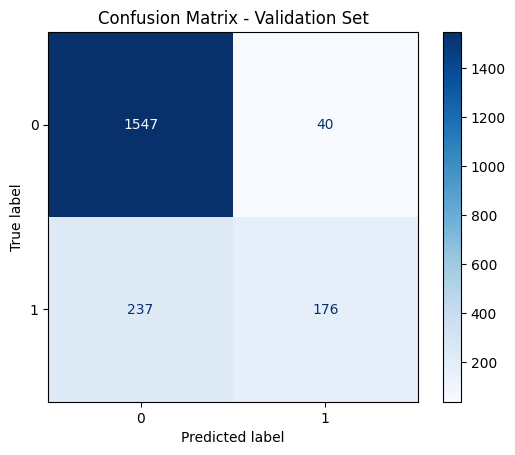

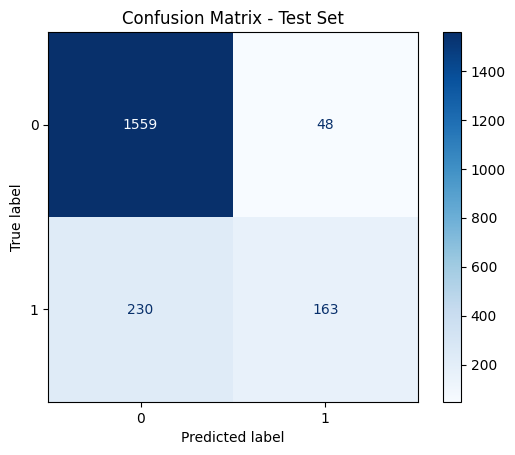

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_rfc = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=10, max_leaf_nodes=80, n_estimators=30)
model_rfc.fit(X_train, train_target)

val_predictions_rfc = model_rfc.predict(X_val)
test_predictions_rfc = model_rfc.predict(X_test)

train_preds_rfc = model_rfc.score(X_train, train_target)
val_preds_rfc = model_rfc.score(X_val, val_target)
test_preds_rfc = model_rfc.score(X_test, test_target)

print(f"Train Accuracy : {train_preds_rfc}")
print(f"Val Accuracy : {val_preds_rfc}")
print(f"Test Accuracy : {test_preds_rfc}")

cm_val = confusion_matrix(val_target, val_predictions_rfc)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp_val.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation Set")
plt.show()

cm_test = confusion_matrix(test_target, test_predictions_rfc)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()


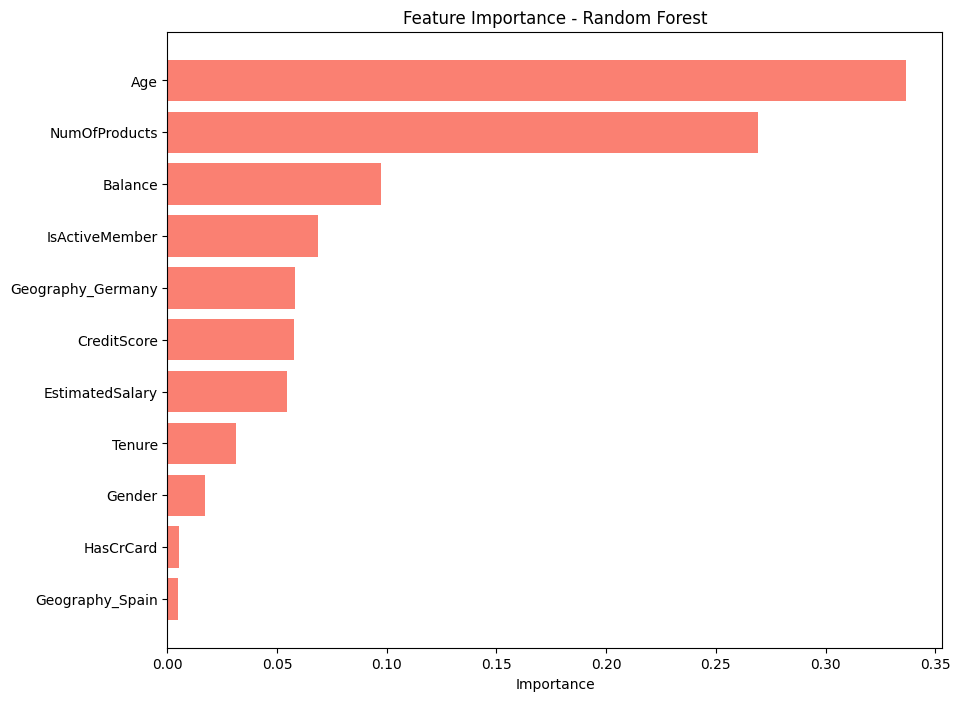

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf_feature_importances = model_rfc.feature_importances_


importance_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='salmon')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

** **bold text**XGBoost**

Train Accuracy : 0.9696666666666667
Val Accuracy : 0.8465
Test Accuracy : 0.8615


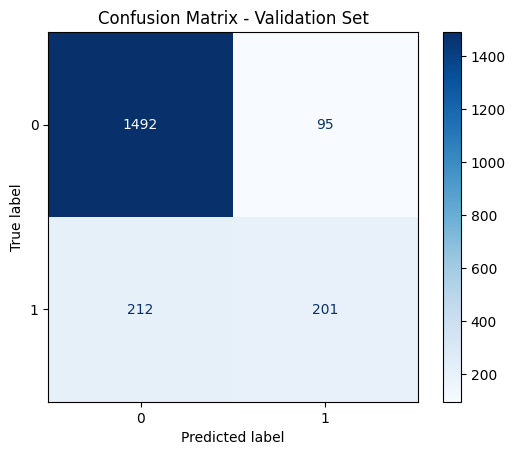

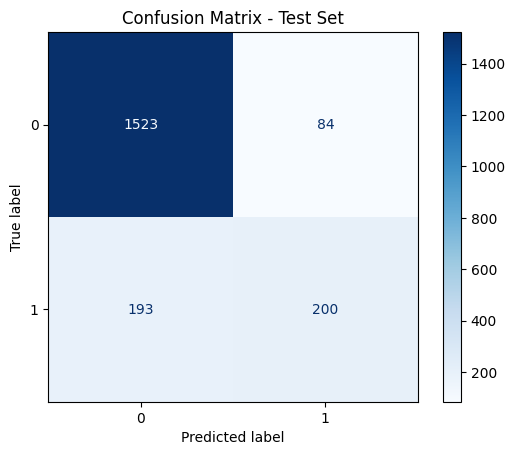

In [30]:
model_xgbc = XGBClassifier(n_jobs=-1, random_state=42)
model_xgbc.fit(X_train, train_target)

val_predictions_xgbc = model_xgbc.predict(X_val)
test_predictions_xgbc = model_xgbc.predict(X_test)


train_preds_xgbc = model_xgbc.score(X_train, train_target)
val_preds_xgbc = model_xgbc.score(X_val, val_target)
test_preds_xgbc = model_xgbc.score(X_test, test_target)

print(f"Train Accuracy : {train_preds_xgbc}")
print(f"Val Accuracy : {val_preds_xgbc}")
print(f"Test Accuracy : {test_preds_xgbc}")

cm_val = confusion_matrix(val_target, val_predictions_xgbc)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp_val.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation Set")
plt.show()


cm_test = confusion_matrix(test_target, test_predictions_xgbc)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

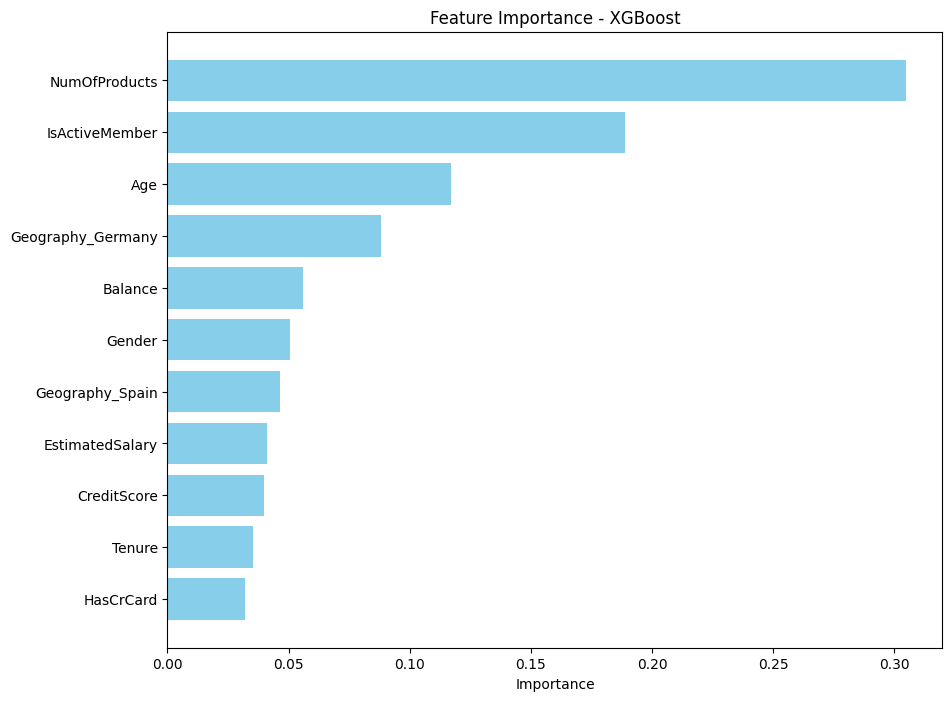

In [31]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

xgb_feature_importances = model_xgbc.feature_importances_


importance_df_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()

In [32]:
with open("model.pkl", "wb") as f:
    pickle.dump(model_rfc, f)